# M3 Brief 2 : Nettoyage et Préparation Éthique d'un Jeu de Données

## Contexte de l'étude


Ce notebook va être utiliser pour préparer un dataset dans le but d'entrainer un modèle destiné à faire une regression pour déterminé le montant de pret maximal que l'on peux accorder à un emprunteur.

On va procéder en 2 étapes :
* **Analyse technique et nettoyage des données** : Le but étant d'avoir un dataset le plus exploitable possible sans aucunes considération métier ou éthique
* **Adaptation du dataset** : La prise en compte des contraintes métier et réglementaire ainsi que les décisions éthique pour la modification de ce dataset afin qu'il réponde à ces 3 paramètres

Remarques :

## Bootstrap
Ces bloc sont à exécuter pour installer et charger les dépendances

In [91]:
from IPython.core.pylabtools import figsize
# Preparation de l'environnement
!pip install -r requirements.txt

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory


In [92]:
# Chargement des modules
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer


## Chargement des données et affichage des données brutes

In [93]:
df = pd.read_csv('data/data-all-complete.csv')
# Suppression des doublons des le début
df.drop_duplicates(inplace=True)
print(f"Le dataset comporte {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataset comporte 10000 lignes et 22 colonnes


In [94]:
df.head()

,nom,prenom,age,taille,poids,sexe,sport_licence,niveau_etude,region,smoker,...,nb_enfants,quotient_caf,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,date_creation_compte,score_credit,loyer_mensuel,montant_pret
0,Foster,Steven,19,175.0,62.5,H,non,bac,Île-de-France,oui,...,0,78.7,4958,veuf,NaN,0.19,2021-04-04,NaN,NaN,500.000000
1,Tapia,Todd,31,190.0,63.5,H,oui,bac+2,Corse,non,...,1,221.8,3001,veuf,NaN,0.93,2023-03-19,NaN,1270.84,786.595929
2,Hardy,Michelle,68,174.6,66.5,H,oui,doctorat,Auvergne-Rhône-Alpes,oui,...,2,227.8,3758,NaN,NaN,0.68,2024-08-27,576.0,NaN,29093.676397
3,Newton,Kenneth,50,187.1,106.8,H,oui,master,Occitanie,non,...,2,64.0,3967,marié,NaN,0.68,2022-03-18,NaN,10000.00,7823.303925
4,Davila,Kathleen,42,169.7,63.4,H,oui,master,Provence-Alpes-Côte d’Azur,non,...,2,19.5,2091,NaN,3.0,0.92,2020-10-17,NaN,5000.00,500.000000


In [95]:
df.describe()

,age,taille,poids,nb_enfants,quotient_caf,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000
mean,46.678800,169.98452,69.864350,1.612800,249.383700,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078
std,16.669812,9.88310,14.808592,1.393223,99.722026,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081
min,18.000000,129.80000,11.700000,-4.000000,-103.900000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000
25%,32.000000,163.40000,59.700000,1.000000,182.300000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000
50%,47.000000,170.00000,69.800000,2.000000,250.200000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057
75%,61.000000,176.60000,80.000000,3.000000,316.300000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527
max,75.000000,208.40000,132.200000,8.000000,621.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000


In [96]:
def calcul_taux_manquant():
    total_rows = df.shape[0]
    # Calcul des pourcentage de lignes manquantes
    historique_credits_rows = df["historique_credits"].count()
    situation_familiale_rows = df["situation_familiale"].count()
    score_credit_rows = df["score_credit"].count()
    loyer_mensuel_rows = df["loyer_mensuel"].count()
    historique_credits_pc_vide = 1 - historique_credits_rows/total_rows
    situation_familiale_pc_vide = 1 - situation_familiale_rows/total_rows
    score_credit_pc_vide = 1 - score_credit_rows/total_rows
    loyer_mensuel_pc_vide = 1 - loyer_mensuel_rows/total_rows
    pc_vide = pd.DataFrame({
        "historique_credits": [historique_credits_pc_vide],
        "situation_familiale": [situation_familiale_pc_vide],
        "score_credit": [score_credit_pc_vide],
        "loyer_mensuel": [loyer_mensuel_pc_vide],
    })
    return pc_vide
print("% données vide au chargements")
calcul_taux_manquant()

% données vide au chargements


,historique_credits,situation_familiale,score_credit,loyer_mensuel
0,0.5308,0.2455,0.5256,0.2971


On constate que plus de la moitier des données relatives a l'évaluation des crédits sont manquantes, le dataset étant orienté sur l'attribution du montant maximal accordé à un emprunteur ces noté sont d'une importance notable.
Il va falloir détertminer comment on va traiter ces valeurs
Concernant la situation_familiale et le loyer_mensuel il faut vérifier si il y'a correlation avec le montant maximum du pret accorder, en fonction de quoi cette données sera exploité ou non.

On cherche s'il y'a correlation entre les valeurs manquantes

<Axes: >

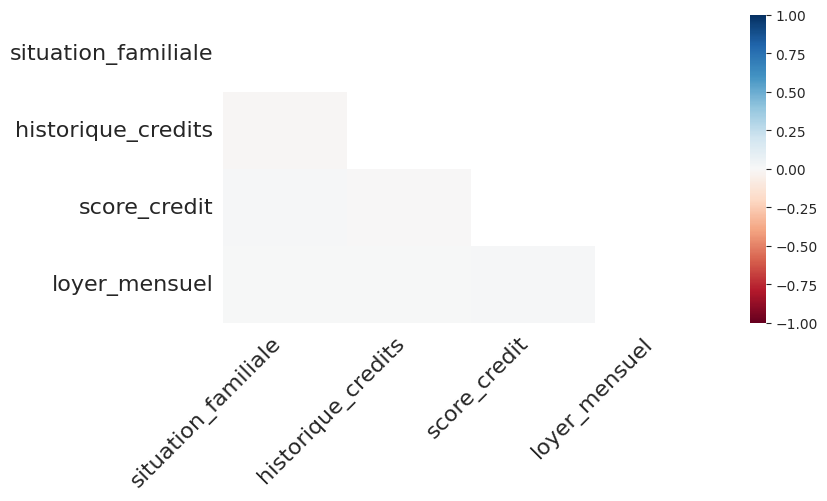

In [97]:
msno.heatmap(df, figsize=(8, 4))

Il n'y a pas de correlation forte entre les données manquantes

### Premières observations

En première analyse rapide on constate :
* Qu'il y'a un ensemble de colonnes ayant des valeurs manquantes, il faudra déterminer les impactes
* On à des valeurs négatives pour le loyer ce qui est plutôt anormal
* On à un percentile 25% identique au minimum pour le montant du pret, ce qui semble indiquer une forte présence de pret à 500 €
* Le poids semble comporter des valeurs aberrantes surtout dans les valeurs les plus petites

Il faudra confirmer ou infirmer ces tendances.

In [98]:
# df.drop(['nom', 'prenom', 'date_creation_compte'], axis=1, inplace=True)
# df.head()

## Analyse de la distribution des valeurs

On trace les histogramme de chaque features histoire de voir rapidement la distribution des valeurs

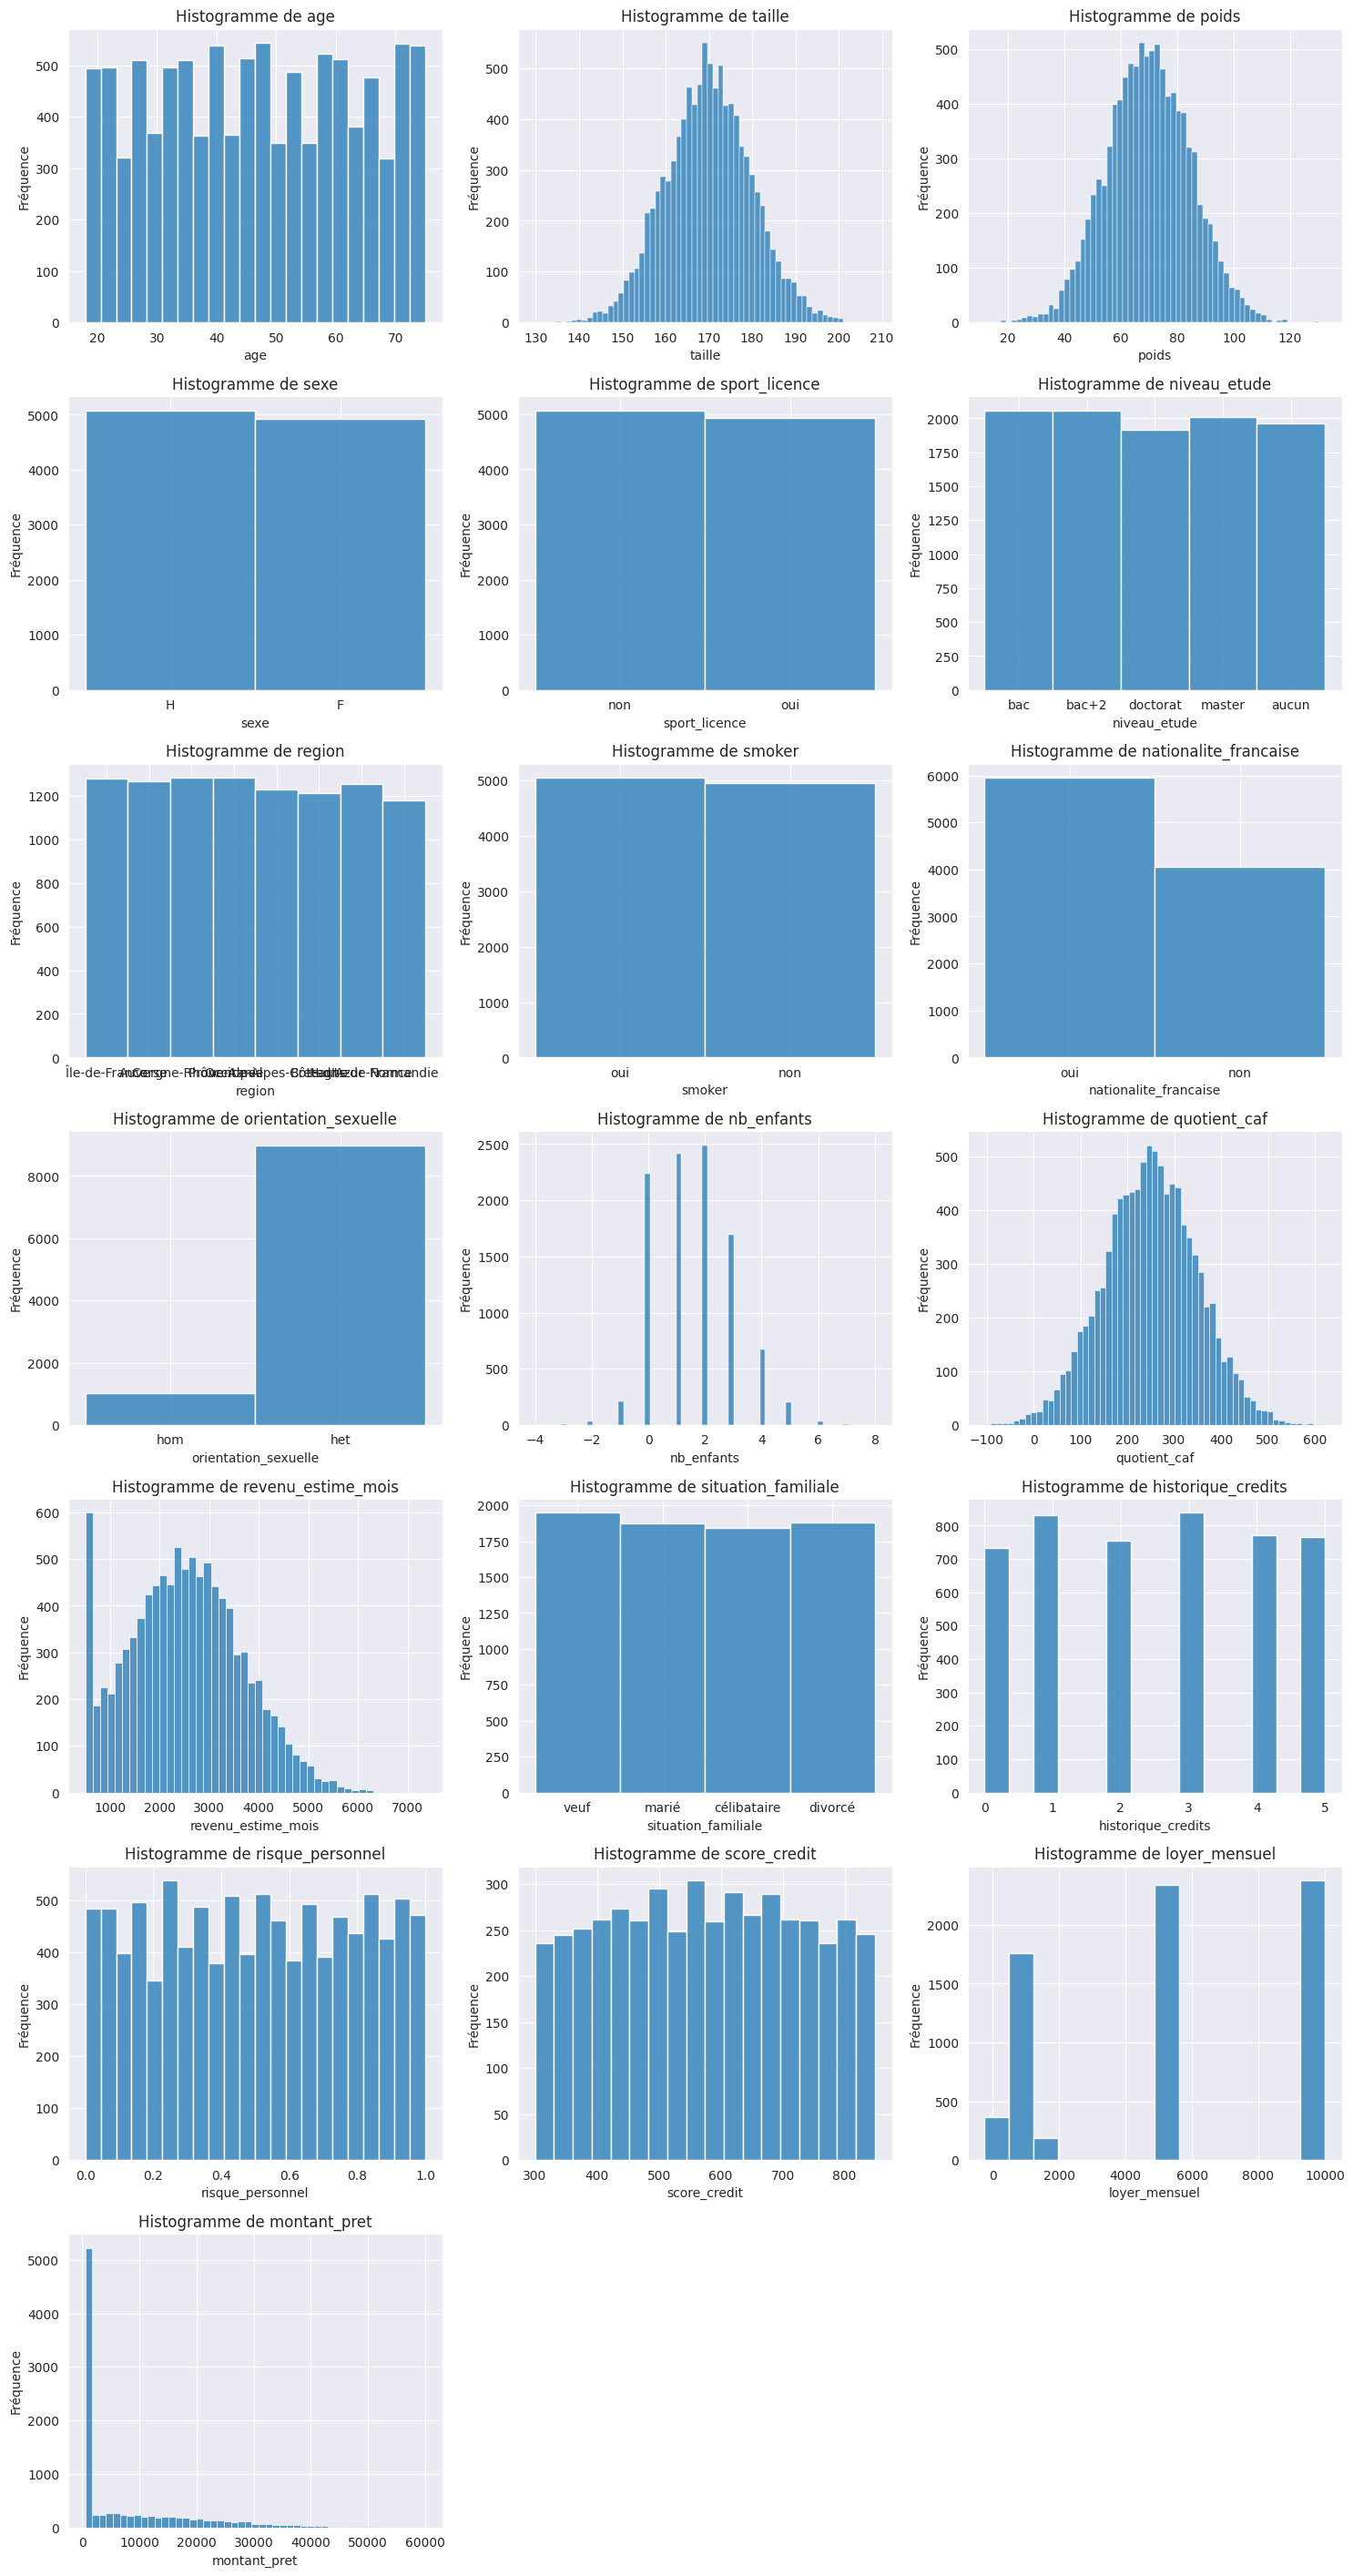

In [99]:
# Determine le nombre de colonne souhaité pour l'affichage du subplot
num_features = df.shape[1] # nombre de features
num_cols = 3 # nombre de colonnes
num_rows = (num_features + num_cols - 1) // num_cols # nombre de lignes

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # On définie la largeur et hauteur des graphe en fonction des valeurs

position = 0
for i, column in enumerate(df.columns):
    if column in ["nom", "prenom", "date_creation_compte"]:
        # On zap les champs qu'on souhaite ignorer dans l'étude
        continue
    position = position + 1
    plt.subplot(num_rows, num_cols, position)
    sns.histplot(df[column])
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()

Il apparait que les données sont globalement correctement distribuées, il y'a cependant quelques features qui semble avoir des données étranges pour les revenus_estimes, le montant_pret et le loyer_mensuel.
Le cas de la nationalité est un peu plus complexe car on ne connais pas exactement comment à été construit le dataset, cette valeur necessitera une analyse plus appronfondi en fonction du contexte de l'obtention de celui-ci.

### revenu estime mois

On zoom sur la partie basse du graphe pour trouver la valeur la plus représentée

<Axes: xlabel='revenu_estime_mois', ylabel='Count'>

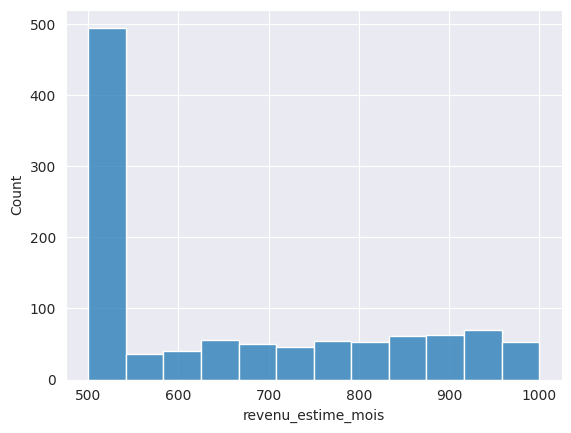

In [100]:
sns.histplot(df[df['revenu_estime_mois'] <= 1000]['revenu_estime_mois'])

On constate une trés forte de concentration de revenue à 500 €, on vérifie ca avec des valeurs numériques

In [101]:
print("Revenus = 500 :", df[df['revenu_estime_mois'] == 500]['revenu_estime_mois'].count())
print("Revenus entre 501 et 1000 :", df[(df['revenu_estime_mois'] > 500) & (df['revenu_estime_mois'] <= 1000)]['revenu_estime_mois'].count())
df[df['revenu_estime_mois'] <= 1000]['revenu_estime_mois'].value_counts(bins=[0.0, 500, 600, 700, 800, 900, 1000], sort=False)

Revenus = 500 : 472
Revenus entre 501 et 1000 : 605


(-0.001, 500.0]    472
(500.0, 600.0]      72
(600.0, 700.0]     126
(700.0, 800.0]     117
(800.0, 900.0]     147
(900.0, 1000.0]    143
Name: count, dtype: int64

On constate que la majorité des bas revenue sont plutôt autour de 500, on peux considérer que cette valeurs est une valeur.

On va regarder rapidement si il y'a une correlation entre les revenues faible et le montant des pret accordés autour de 500, le cas des montant de pret sera traité plus loins dans ce document.

In [102]:
df_bas_revenue = df[df['revenu_estime_mois'] <= 1000]
df_bas_revenue[['revenu_estime_mois', 'montant_pret']].corr()


,revenu_estime_mois,montant_pret
revenu_estime_mois,1.000000,0.043802
montant_pret,0.043802,1.000000


In [103]:
df[['revenu_estime_mois', 'montant_pret']].corr()

,revenu_estime_mois,montant_pret
revenu_estime_mois,1.000000,0.233971
montant_pret,0.233971,1.000000


Il ne semble pas y avoir de correlation franche entre les faible revenus et le montant du pret pour ceux ci, contrairement à la situation pour tout le dataset. On ne peux pas établir que les petit revenus donne lieux uniquement à des pret de 500.

### Loyer mensuel

On voit 2 pics sur les loyers mensuels, beaucoup de loyer à 5000 et à 10000

In [104]:
df[df['loyer_mensuel'] > 4000]['loyer_mensuel'].value_counts()

loyer_mensuel
10000.0    2379
5000.0     2338
Name: count, dtype: int64

Une winsorisation des valeurs de loyer n'aurais pas de sens car trop de valeurs hors limites supérieur sont présentes, le 99eme quantil reste à 10000.


In [105]:
q1 = df['loyer_mensuel'].quantile(0.01)
print(f"Quantile = {q1}")
q99 = df['loyer_mensuel'].quantile(0.99)
print(f"Quantile = {q99}")

Quantile = 201.0892
Quantile = 10000.0


On regarde la distribution des valeurs en excluant ce valeurs extremes.

<Axes: xlabel='loyer_mensuel', ylabel='Count'>

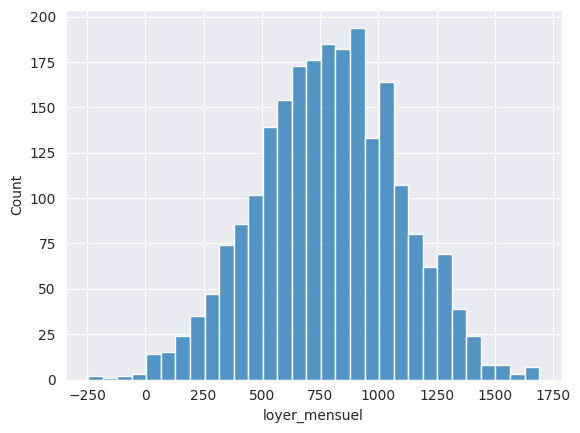

In [106]:
sns.histplot(df[df['loyer_mensuel'] < 5000]['loyer_mensuel'])

<Axes: xlabel='loyer_mensuel', ylabel='revenu_estime_mois'>

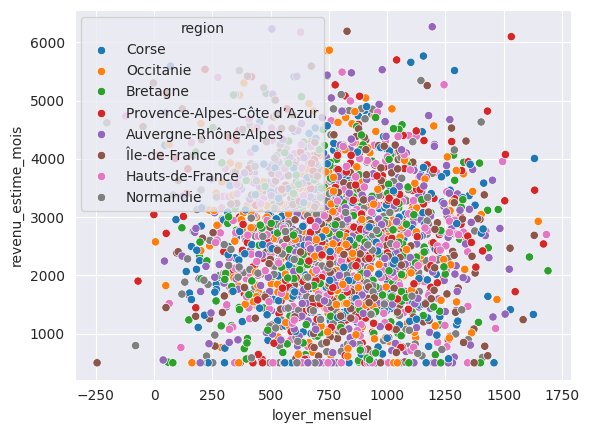

In [107]:
sns.scatterplot(data=df[df['loyer_mensuel'] < 5000], x='loyer_mensuel', y='revenu_estime_mois', hue='region')

Il n'y a pas de correlation franche entre les revenus estimé et la region avec les loyers mensuel.
On va utiliser les plus proche voisins pour reconstruire les montants des loyers pour les valeurs extremes.

On décide de se baser sur la region et le revenu_estime_mois


In [108]:
df["region"].unique()

array(['Île-de-France', 'Corse', 'Auvergne-Rhône-Alpes', 'Occitanie',
       'Provence-Alpes-Côte d’Azur', 'Bretagne', 'Hauts-de-France',
       'Normandie'], dtype=object)

In [109]:
df['region_num'] = df['region'].map({
    'Occitanie': 0,
    'Île-de-France': 1,
    'Auvergne-Rhône-Alpes': 2,
    'Corse': 3,
    'Bretagne': 4,
    'Hauts-de-France': 5,
    'Provence-Alpes-Côte d’Azur': 6,
    'Normandie': 7
})

In [110]:
# pd.to_numeric(df[df['loyer_mensuel'] >= 5000]['loyer_mensuel']).unique()
df[df['loyer_mensuel'] >= 5000]['loyer_mensuel'].info()

<class 'pandas.core.series.Series'>
Index: 4717 entries, 3 to 9999
Series name: loyer_mensuel
Non-Null Count  Dtype  
--------------  -----  
4717 non-null   float64
dtypes: float64(1)
memory usage: 73.7 KB


In [111]:
# On met à balcn les valeurs extremes
df.loc[df['loyer_mensuel'] >= 5000, 'loyer_mensuel'] = np.nan

imputer = KNNImputer(n_neighbors=5)
df[["revenu_estime_mois", "region_num", "loyer_mensuel"]] = imputer.fit_transform(
    df[["revenu_estime_mois", "region_num", "loyer_mensuel"]]
)

# On supprime la colonne temporaire 'region_num' utilisé juste pour les calcules
df.drop('region_num', axis=1, inplace=True)

<Axes: xlabel='loyer_mensuel', ylabel='Count'>

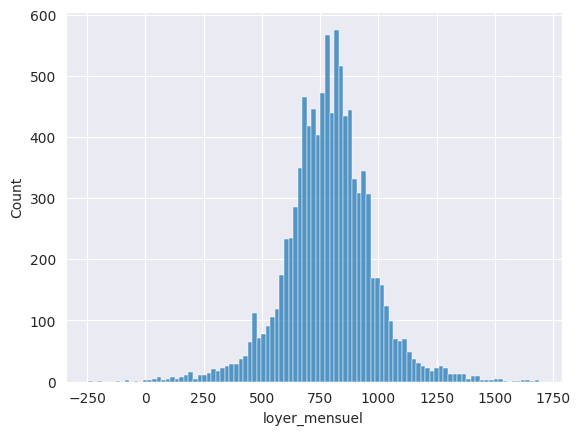

In [112]:
sns.histplot(df['loyer_mensuel'])

Cette fois ci, on va faire une winsorisation

Quantile = 260.35810000000004
Quantile = 1298.3356


<Axes: xlabel='loyer_mensuel', ylabel='Count'>

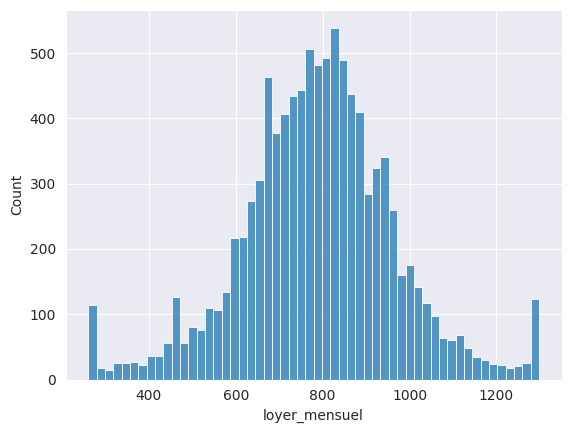

In [113]:
q1 = df['loyer_mensuel'].quantile(0.01)
print(f"Quantile = {q1}")
q99 = df['loyer_mensuel'].quantile(0.99)
print(f"Quantile = {q99}")
df['loyer_mensuel'] = np.clip(df['loyer_mensuel'], q1, q99)
sns.histplot(df['loyer_mensuel'])

In [114]:
calcul_taux_manquant()

,historique_credits,situation_familiale,score_credit,loyer_mensuel
0,0.5308,0.2455,0.5256,0.0


On à ramener à 0 le nombre de loyen mensuel manquant grace aux estimations

### montant de pret

On constate un grand pic de pret dans les montants inférieurs, on affine l'analyse.

<Axes: xlabel='montant_pret', ylabel='Count'>

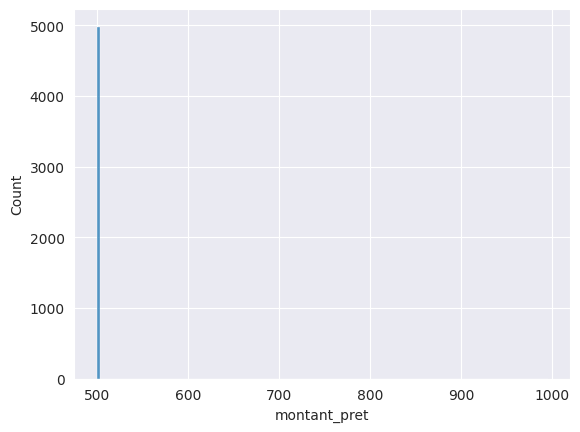

In [115]:
sns.histplot(df[df['montant_pret'] <= 1000]['montant_pret'])

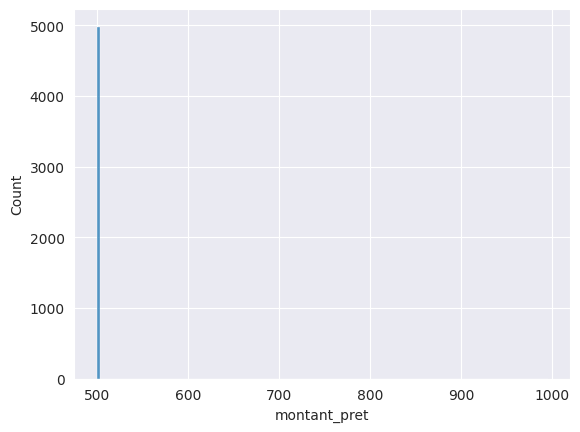

(-0.001, 500.0]    4979
(500.0, 600.0]       16
(600.0, 700.0]       19
(700.0, 800.0]       22
(800.0, 900.0]       19
(900.0, 1000.0]      21
Name: count, dtype: int64

In [116]:
sns.histplot(df[df['montant_pret'] <= 1000]['montant_pret'])
plt.show()
df[df['montant_pret'] <= 1000]['montant_pret'].value_counts(bins=[0.0, 500, 600, 700, 800, 900, 1000], sort=False)

On constate une grande présence de pret à 500, ce sont des pret de faible valeurs, on conserve ces valeurs inchangée car on considère que ce sont des prêt standard.

### Calcul de l'historique credit manquant

Pour cela on va travailler sur une copie des données et utiliser le KNNImputer pour reconstruire les valeurs manquantes basé sur l'age, le revenu estimé, le risque personnel et le montant du pret.

De cette manière on pourra estimer si il est pertinent d'utiliser cette méthode.

<Axes: xlabel='historique_credits', ylabel='Count'>

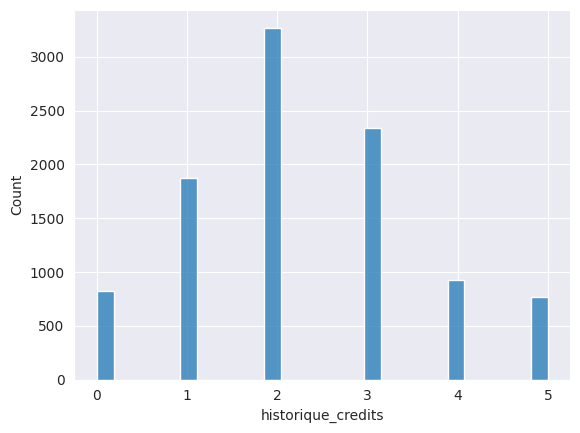

In [117]:
df_imputer = df.copy()
# On applique l'imputer KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputer[["age", "revenu_estime_mois",  "risque_personnel", "montant_pret", "historique_credits"]] = imputer.fit_transform(
    df_imputer[["age", "revenu_estime_mois",  "risque_personnel", "montant_pret", "historique_credits"]]
)
# L'imputer travaillant sur des nombre flottant, on converti la colonne en antier pour rester cohérent dans les données.
df_imputer['historique_credits'] = df_imputer['historique_credits'].astype(int)

sns.histplot(df_imputer['historique_credits'])

On constate une modification significative de la distribution, on va donc ignorer cette méthode, pour la suite du traitement on va supprimer les lignes ou ce score est manquant, mais avant on conserve le dataset en l'état pour le calcul du score_credit.

### Determination de correlation entre historique_credits et score_credit

On va utiliser ici une méthode manuelle à des fins d'apprentissage, voir si on a une relation entre ces 2 valeurs, ca permettra de déterminer comment on pourrait éventuellement reconstruire les valeurs manquantes


(2222, 22)


<Axes: xlabel='historique_credits', ylabel='score_credit'>

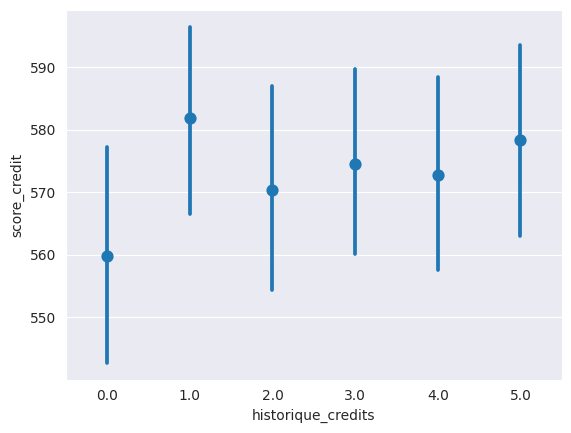

In [118]:
df_histo_score_credit = df[df["historique_credits"].notna() & df["score_credit"].notna()]
print(df_histo_score_credit.shape)
nb_full_ligne = df_histo_score_credit.shape[0]
sns.pointplot(data=df_histo_score_credit, x="historique_credits", y="score_credit", linestyles='none')

Par rapport aux données existantes il semble y avoir une tendance qui se dessine entre l'historique de crédit et le score crédit. On semble plus faire confiance aux personnes qui n'ont pas de crédit ou qui en ont fait l'exprerience a plusieurs reprises.

On va tenter d'obtenir des valeurs plus précise sur cette éventuelle correlation. Voyons avec des valeurs numériques.

In [119]:
df_histo_score_credit.groupby("historique_credits")["score_credit"].describe()

,count,mean,std,min,25%,50%,75%,max
historique_credits,,,,,,,,
0.0,342.0,559.763158,156.859350,301.0,421.25,571.0,695.25,848.0
1.0,379.0,581.812665,151.673327,300.0,454.50,587.0,712.50,846.0
2.0,363.0,570.385675,155.204232,300.0,443.50,569.0,696.00,849.0
3.0,383.0,574.537859,153.917017,304.0,439.00,576.0,706.50,849.0
4.0,376.0,572.723404,156.849833,300.0,437.75,559.0,701.00,848.0
5.0,379.0,578.356201,158.161318,300.0,445.50,593.0,708.00,848.0


Ca semble confirmer ce qui apparaissait visuellement dans le graphe, on peux essayer de recontruire les valeurs manquantes sur ces bases. On va prendre la moyenne comme valeur appliquée.

On ne peut appliquer ces valeurs qu'aux colonnes dont l'historique crédit est définie mais pas le score crédit. On va vérifier si beaucoup de lignes sont dans ce cas

In [120]:
print(df[df["historique_credits"].notna() & df["score_credit"].isna()].shape)

(2470, 22)


2520 lignes sont dans ce cas, On va donc faire la substitution


In [121]:
# On substitue les valeurs vides avec les valeurs calculées
df.loc[(df["historique_credits"] == 0.0) & df["score_credit"].isna(), 'score_credit'] = 560
df.loc[(df["historique_credits"] == 1.0) & df["score_credit"].isna(), 'score_credit'] = 582
df.loc[(df["historique_credits"] == 2.0) & df["score_credit"].isna(), 'score_credit'] = 570
df.loc[(df["historique_credits"] == 3.0) & df["score_credit"].isna(), 'score_credit'] = 575
df.loc[(df["historique_credits"] == 4.0) & df["score_credit"].isna(), 'score_credit'] = 573
df.loc[(df["historique_credits"] == 5.0) & df["score_credit"].isna(), 'score_credit'] = 578

# On vérifie que les valeurs sont correctement substitué
print(df[df["historique_credits"].notna() & df["score_credit"].isna()].shape)

(0, 22)


Le résultatindique bien qu'il n'y à plus de lignes où `score_credit` est vide lorsqu'on à une valeur dans `historique_credit`.

On va maintenant comparer les valeurs de substitution avec les données réelles lorsque les deux valeurs sont présentes, très logiquement il ne devrait pas y avoir de gros eccarts dans les moyennes et l'eccart type devrait se réduire car on insère beaucoup de valeurs moyennes.

(4692, 22)
nombre de ligne reconstruite :  2470


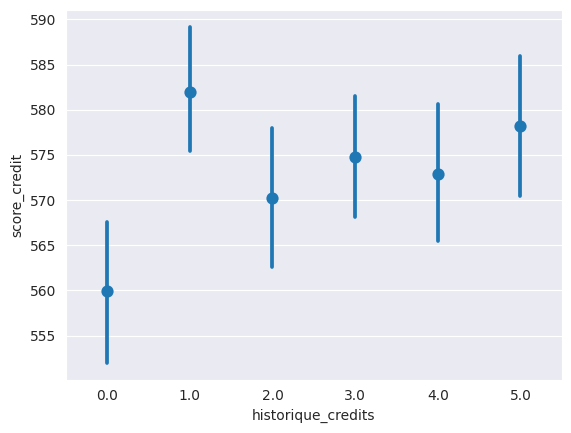

,count,mean,std,min,25%,50%,75%,max
historique_credits,,,,,,,,
0.0,734.0,559.889646,106.988200,301.0,560.0,560.0,560.0,848.0
1.0,830.0,581.914458,102.418410,300.0,582.0,582.0,582.0,846.0
2.0,754.0,570.185676,107.612087,300.0,570.0,570.0,570.0,849.0
3.0,838.0,574.788783,103.981638,304.0,575.0,575.0,575.0,849.0
4.0,770.0,572.864935,109.530954,300.0,573.0,573.0,573.0,848.0
5.0,766.0,578.176240,111.177272,300.0,578.0,578.0,587.5,848.0


In [122]:
df_histo_score_credit_rebuild = df[df["historique_credits"].notna() & df["score_credit"].notna()]
print(df_histo_score_credit_rebuild.shape)
nb_full_ligne_rebuild = df_histo_score_credit_rebuild.shape[0]
print("nombre de ligne reconstruite : ", nb_full_ligne_rebuild - nb_full_ligne)
# Nombre de ligne complétée
sns.pointplot(data=df_histo_score_credit_rebuild, x="historique_credits", y="score_credit", linestyles='none')
plt.show()
df_histo_score_credit_rebuild.groupby("historique_credits")["score_credit"].describe()

Comme prévu les moyennes ont peu bougées et l'eccart type s'est reserré.



#### Conclusion

On va conserver cette approche pour compléter le score crédit pour la suite du traitement.


In [123]:
calcul_taux_manquant()

,historique_credits,situation_familiale,score_credit,loyer_mensuel
0,0.5308,0.2455,0.2786,0.0


On a pu réduire de moitier l'absence de valeur pour le score crédit.

Maintenant on peux supprimer toutes les lignes où historique_credits n'est pas définie.

In [124]:
df = df.dropna(subset=['historique_credits'])
calcul_taux_manquant()

,historique_credits,situation_familiale,score_credit,loyer_mensuel
0,0.0,0.249147,0.0,0.0


### Situation familiale

On a vu que la distribution de cette ligne est trés uniforme, on choisis de mettre des valeurs aléatoire parmi celle existante lorsque la valeur n'est pas définie. On pourrait prendre la valeur la plus représenter via un imputer, mais ca risquerait de déséquilibré le dataset.

In [125]:
np.random.seed(42) # On fixe la seed pseudo aléatoire sur la réponse à la grande question, qu'est ce que la vie, l'univers et tout le reste. Ceci afin de garantir d'avoir une reconstruction identique à chaque éxecution.
type_situation = df[df['situation_familiale'].notna()]['situation_familiale'].unique() # determination de la liste des valeurs possibles
print(type_situation)
taille_isna=df['situation_familiale'].isna().sum() # nombre de ligne vide
print(taille_isna)
tableau_random = np.random.choice(type_situation, taille_isna) # creer un tableau de valeur aléatoire
df.loc[df['situation_familiale'].isna(), 'situation_familiale'] = tableau_random # on bourre les valeur vide avec les valeurs aléatoire récupérées

calcul_taux_manquant()


['marié' 'veuf' 'célibataire' 'divorcé']
1169


,historique_credits,situation_familiale,score_credit,loyer_mensuel
0,0.0,0.0,0.0,0.0


### Traitement de nottoyage simple des colonnes taille et poids

Les colonnes ayant quelques valeurs aberrantes en faible quantités, on va appliquer la winsorisation à celle-ci pour les remettre dans les valeurs correctes

In [126]:
for colonne in ['poids', 'taille']:
    q1 = df[colonne].quantile(0.01)
    print(f"Quantile {colonne} = {q1}")
    q99 = df[colonne].quantile(0.99)
    print(f"Quantile {colonne} = {q99}")
    df[colonne] = np.clip(df[colonne], q1, q99)


Quantile poids = 35.391
Quantile poids = 104.20900000000002
Quantile taille = 147.89100000000002
Quantile taille = 193.80900000000003


### Conclusion

On à pu recontruire un dataset complet en faisant différent choix de reconstruction et de suppression de données. On enregistre celui-ci sous le nom `reconstructed_dataset.csv` dans le dossier data.



## Analyse éthique

Maintenant qu'on à un dataset reconstruit, on va faire une étude de corrélation pour voir les critère qui font varier les montant de pret maximaux.
On utilise un ensemble de pairgrid pour avoir un apperçu rapide.

On reviendra sur une étude plus précise si on constate des valeurs un peu complexe à analyser.

In [127]:
# au lieu d'utiliser map, on peux utiliser factorize
# df['sexe_num'], labels_uniques = pd.factorize(df['sexe'])
# print(labels_uniques)
# df['sport_licence_num'], labels_uniques = pd.factorize(df['sport_licence'])
# print(labels_uniques)
# df['niveau_etude_num'], labels_uniques = pd.factorize(df['niveau_etude'])


On va chercher les données de dictionnaire dans la base de données

In [128]:
from models import Pret, Client, Region, Niveau_etude, Base
from sqlalchemy import create_engine, select
from sqlalchemy.orm import sessionmaker


engine = create_engine('sqlite:///./data/database.db')
Base.metadata.create_all(bind=engine)
session = sessionmaker(bind=engine)()

dico_etude = {niveau.nom: niveau.id for niveau in session.scalars(select(Niveau_etude)).all()}
print(dico_etude)
dico_region = {region.nom: region.id for region in session.scalars(select(Region)).all()}
print(dico_region)

{'aucun': 1, 'bac': 2, 'bac+2': 3, 'master': 4, 'doctorat': 5}
{'Île-de-France': 1, 'Auvergne-Rhône-Alpes': 2, 'Bretagne': 3, 'Hauts-de-France': 4, 'Provence-Alpes-Côte d’Azur': 5, 'Occitanie': 6, 'Normandie': 7, 'Corse': 8}


On met des valeurs numérique pour les valeurs text et trouver les correlations

In [129]:
plt.figure(figsize=(12,8))
# sns.heatmap(df[[
#     "age", "taille", "poids", "revenu_estime_mois",
#     "score_credit", "loyer_mensuel", "montant_pret"
# ]].corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
df['smoker_num'] = df['smoker'].map({
    'oui': 1,
    'non': 0
})
df['sexe_num'] = df['sexe'].map({
    'F': 1,
    'H': 0
})
df['sport_licence_num'] = df['sport_licence'].map({
    'oui': 1,
    'non': 0
})
df['nationalite_francaise_num'] = df['nationalite_francaise'].map({
    'oui': 1,
    'non': 0
})
df['orientation_sexuelle_num'] = df['orientation_sexuelle'].map({
    'het': 1,
    'hom': 0
})

df['niveau_etude_num'] = df['niveau_etude'].map(dico_etude)
df['region_num'] = df['region'].map(dico_region)

#sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")

<Figure size 1200x800 with 0 Axes>

<Axes: >

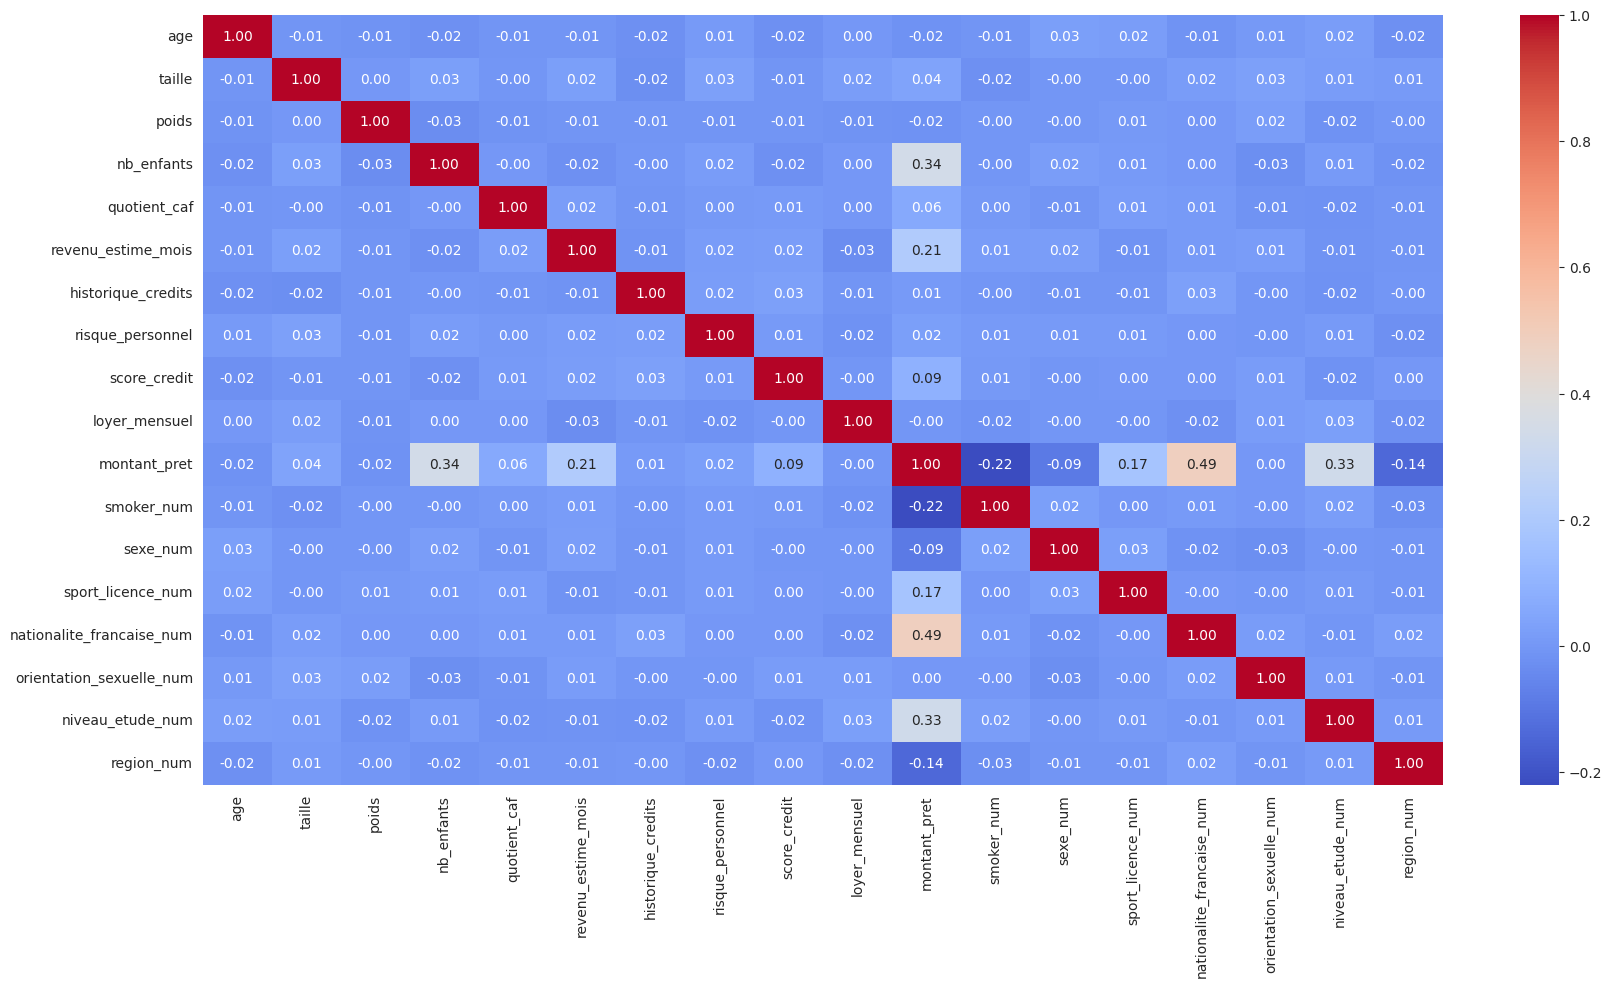

In [130]:
corr_map = df.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr_map, annot=True, cmap="coolwarm", fmt=".2f")


## Sauvegarde du fichier intermédiaire

On sauvegarde ce fichier avec toutes les colonnes en sus pour pouvoir repartir sur le dataset reconstruit et ses colonnes de travail.

In [131]:
df.to_csv('data/03-intermediate-new-dataset.csv', index=False, encoding='utf-8-sig')

## Analyse (rapide)

De la heat map on voit qu'il des correlations marquées entre le montant de pret `nationalite_francaise`, `nb_enfants`, `revenu_estime_mois`, `smoker`, `niveau_etude`. Et dans une moindre mesures `sport_licence`, `region`


## Nettoyage

In [132]:
df.head()

,nom,prenom,age,taille,poids,sexe,sport_licence,niveau_etude,region,smoker,...,score_credit,loyer_mensuel,montant_pret,smoker_num,sexe_num,sport_licence_num,nationalite_francaise_num,orientation_sexuelle_num,niveau_etude_num,region_num
4,Davila,Kathleen,42,169.7,63.4,H,oui,master,Provence-Alpes-Côte d’Azur,non,...,575.0,1010.612,500.000000,0,0,1,0,1,4,5
8,Deleon,James,31,163.8,64.9,H,oui,doctorat,Bretagne,oui,...,818.0,980.978,22143.694141,1,0,1,1,0,5,3
11,Hernandez,Eric,68,165.0,52.8,H,oui,master,Normandie,oui,...,414.0,740.572,4324.856803,1,0,1,0,1,4,7
13,Roberson,Emily,57,171.9,36.1,H,oui,aucun,Bretagne,non,...,629.0,708.088,500.000000,0,0,1,0,1,1,3
14,Watts,Sara,35,181.1,63.5,F,non,aucun,Normandie,oui,...,516.0,709.094,500.000000,1,1,0,1,1,1,7


In [133]:
# On fait le ménage
cleanup = False
if cleanup:
    df.drop(['nom', 'prenom', 'date_creation_compte'], axis=1, inplace=True)

## Sauvegarde finale

Sauvegarde final du fichier `training_dataset-new.csv` dans le but de l'utiliser pour réentrainer le model.

Nota on récupère la pratique sportive, en 'simulant' que ca deviens une données obligatoire.

In [134]:
df.drop(['nom', 'prenom', 'date_creation_compte', 'age', 'taille', 'poids', 'sexe', 'nationalite_francaise', 'orientation_sexuelle', 'quotient_caf', 'situation_familiale', 'risque_personnel'], axis=1, inplace=True)

# Suppression des colonnes de travail

df.drop(['smoker_num','sexe_num', 'sport_licence_num', 'nationalite_francaise_num', 'orientation_sexuelle_num', 'niveau_etude_num', 'region_num'], axis=1, inplace=True)

In [135]:
df.to_csv('data/training_dataset-new.csv', index=False, encoding='utf-8-sig')